# Decision Tree - EDA and Training

#### Import Packages and Dataset


In [1]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Import DataSet

total_data = pd.read_csv('/workspaces/gustavolima-decisiontree/data/raw/decision-tree_diabetes.csv')
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### DataSet Analysis

##### Dataset Information

In [3]:
# Dataset Shape
total_data.shape

(768, 9)

In [4]:
# Dataset Data Info
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Duplicate Removal
if total_data.duplicated().sum() > 0 :
    total_data.drop_duplicates()

#### Univariate Numeric Analysis

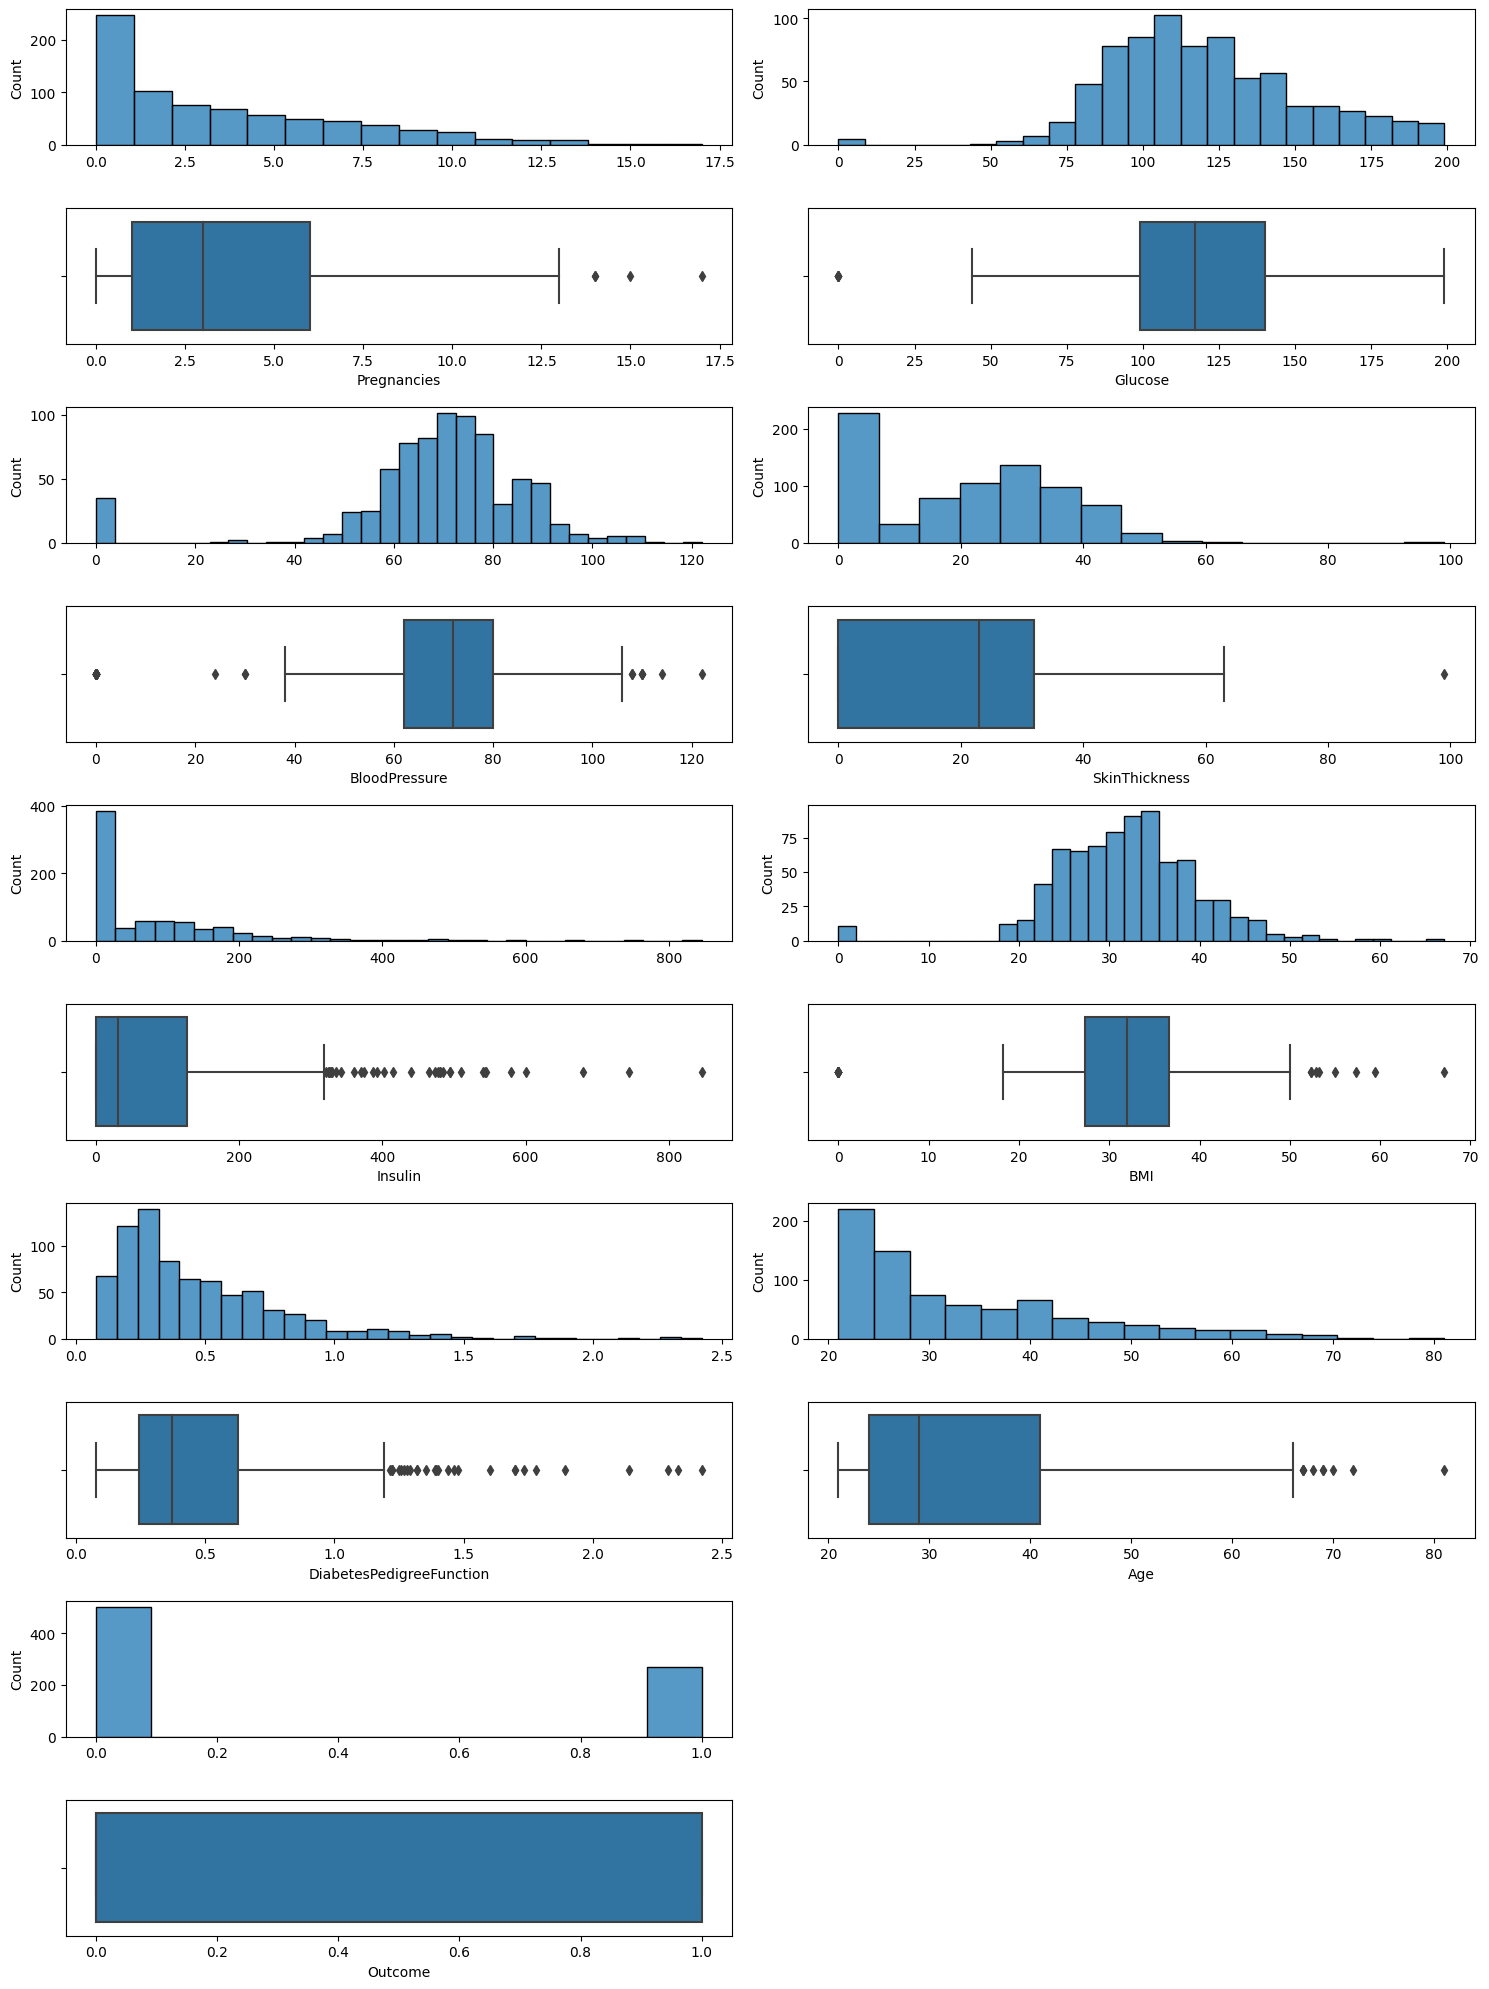

In [6]:
# Univariate Numeric Analysis

# Gather all columns in a variable-
column_names = total_data.columns

# Create Figure
fig, axis = plt.subplots(10, 2, figsize=(15, 20))

# Plot the Data
# Iterate through each column and plot histograms and box plots
for i, col_name in enumerate(column_names):
    if i % 2 == 0 :
        sns.histplot(ax=axis[i, 0], data=total_data, x=col_name).set(xlabel=None)
        sns.boxplot(ax=axis[i + 1, 0 ], data=total_data, x=col_name)
    else :
        sns.histplot(ax=axis[i - 1, 1], data=total_data, x=col_name).set(xlabel=None)
        sns.boxplot(ax=axis[i , 1 ], data=total_data, x=col_name)
fig.delaxes(axis[8,1])
fig.delaxes(axis[9,1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Looking at the Numeric Data Analysis:

- There are a few 0 values, which are guaranteed errors, as if their value is 0, it means you either dead or don't exist (Glucose, Bloodpressure, BMI)
- Apart from that, data is distrubuted normally in many of the cases
- The present outliers (other than 0) are OK and important for the Data Analysis

#### Multivariate Numerical Data Analysis

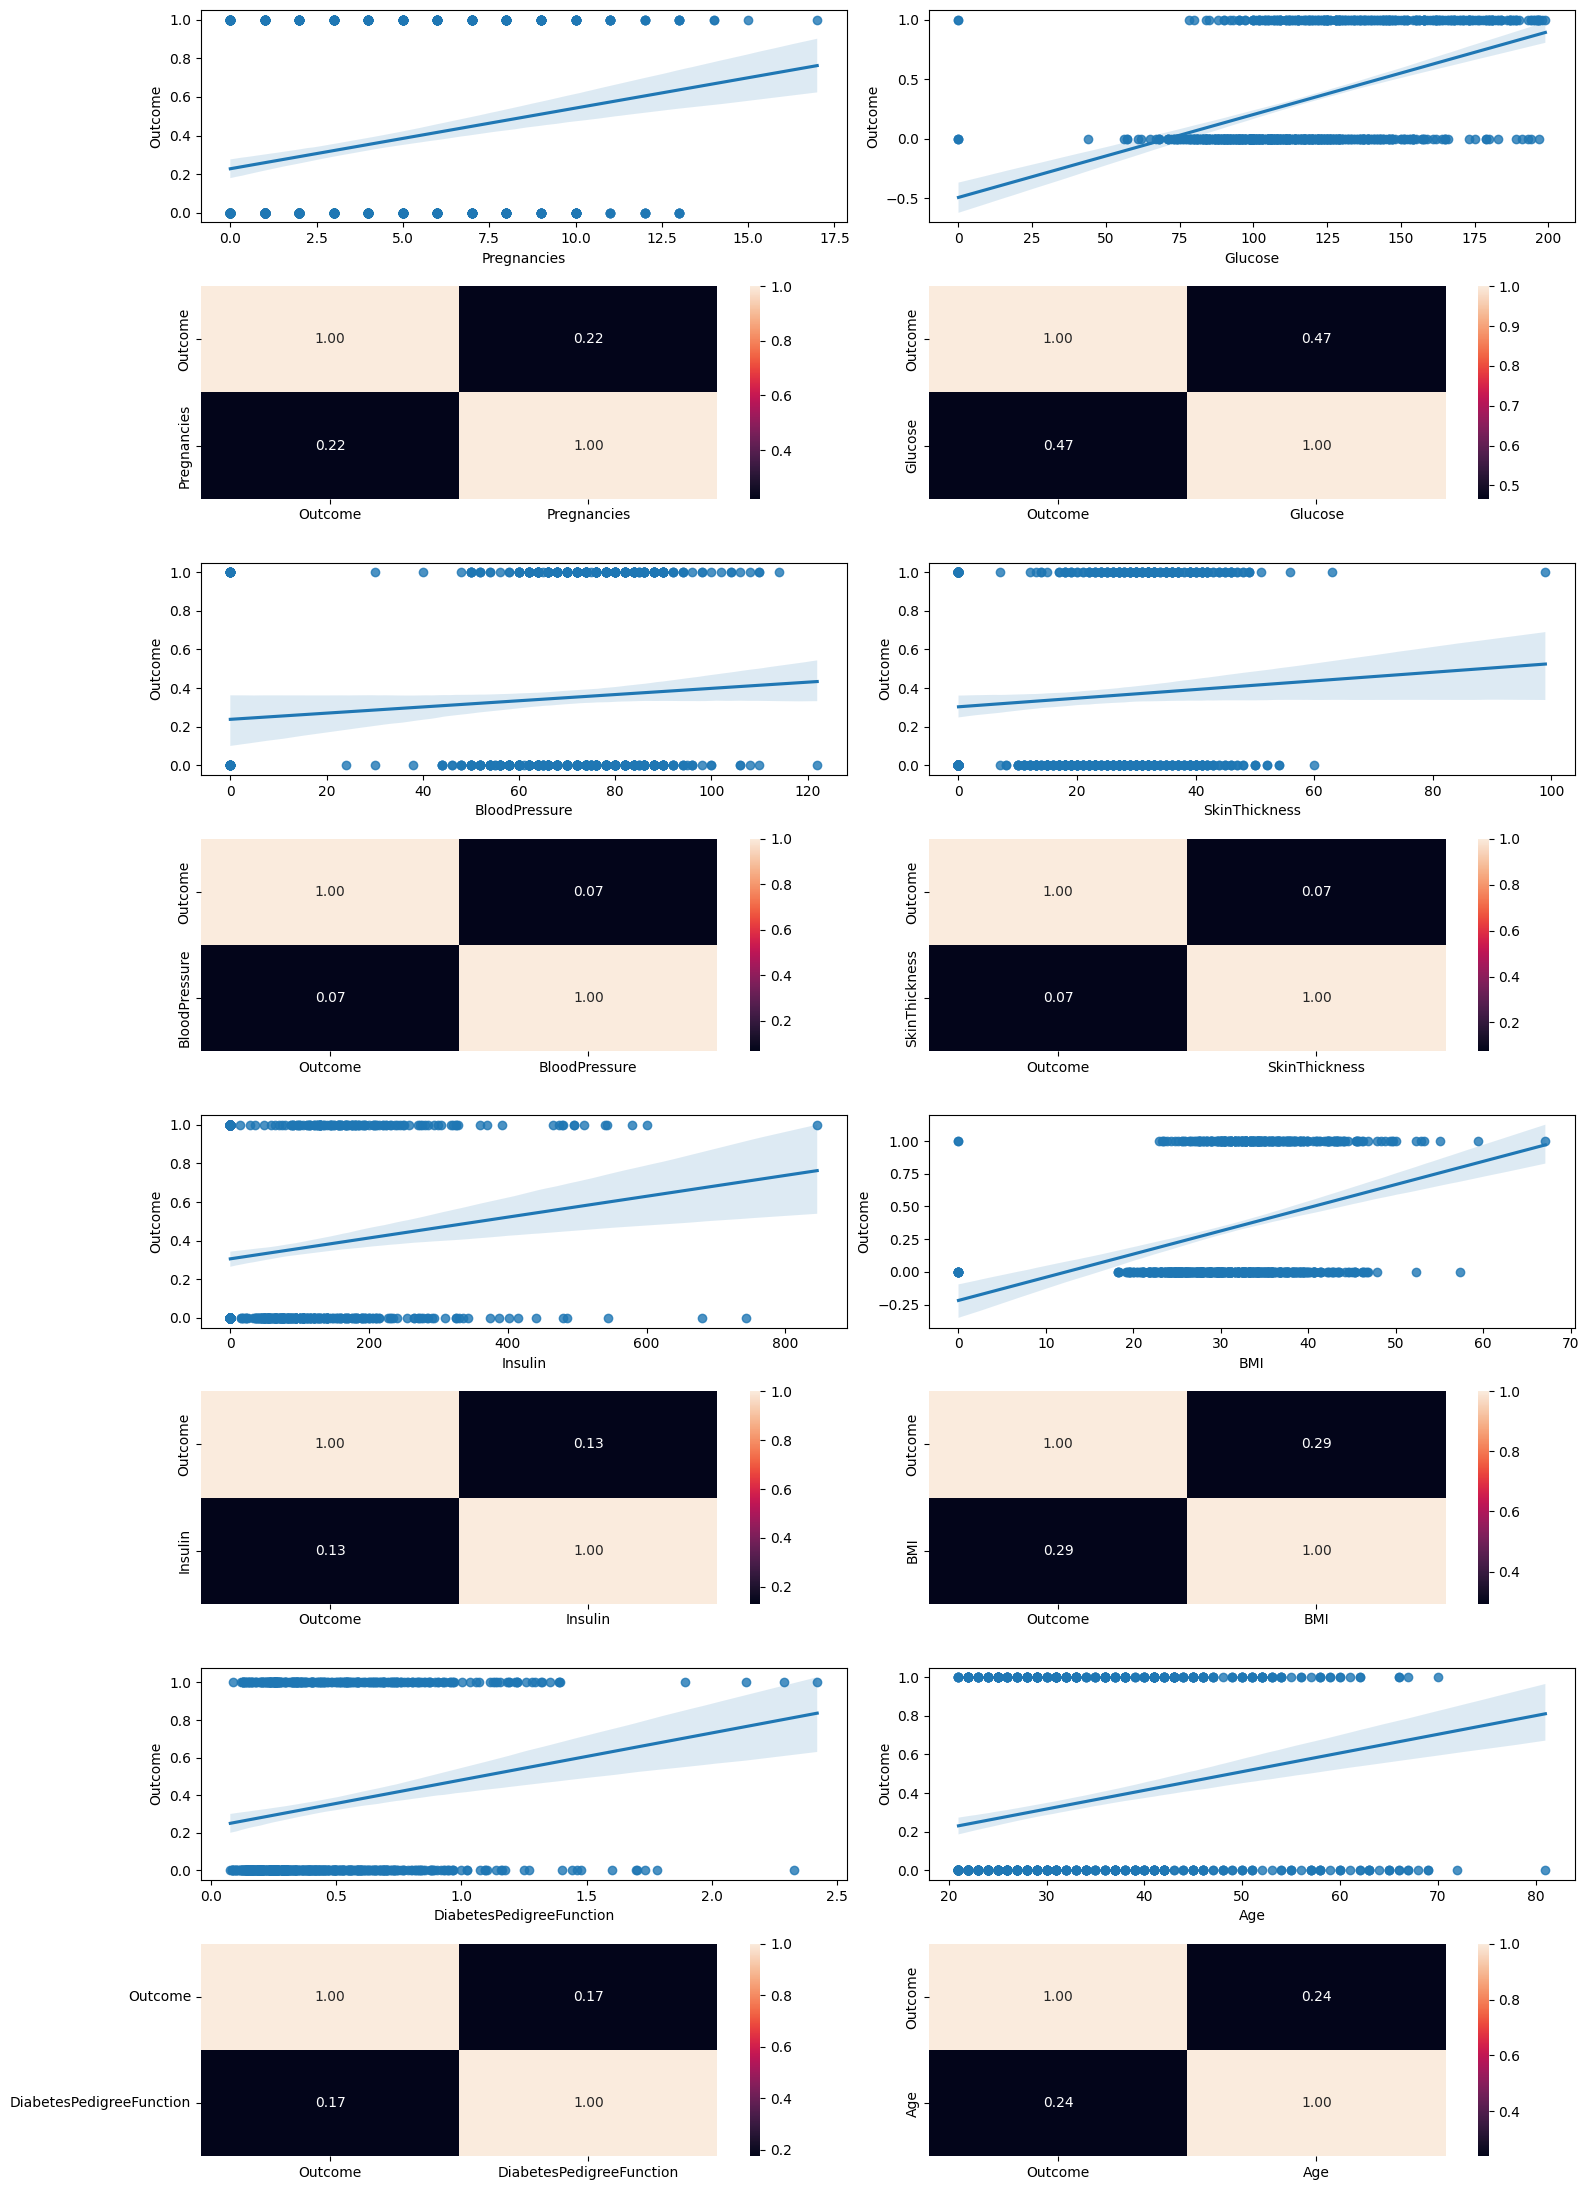

In [7]:
# Multivariate Numerical Data Analysis

# List of column names from your dataset
column_names = total_data.loc[:, total_data.columns != 'Outcome'].columns

# Create the subplots with custom height ratios
fig, axis = plt.subplots(8, 2, figsize=(16, 22))

# Iterate through each column and plot histograms and box plots
for i, col_name in enumerate(column_names):
    if i % 2 == 0:
        sns.regplot(ax=axis[i, 0], data=total_data, x=col_name, y='Outcome')
        sns.heatmap(total_data[['Outcome', col_name]].corr(), annot=True, fmt=".2f", ax=axis[i + 1, 0])
    else:
        sns.regplot(ax=axis[i - 1, 1], data=total_data, x=col_name, y='Outcome')
        sns.heatmap(total_data[['Outcome', col_name]].corr(), annot=True, fmt=".2f", ax=axis[i, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

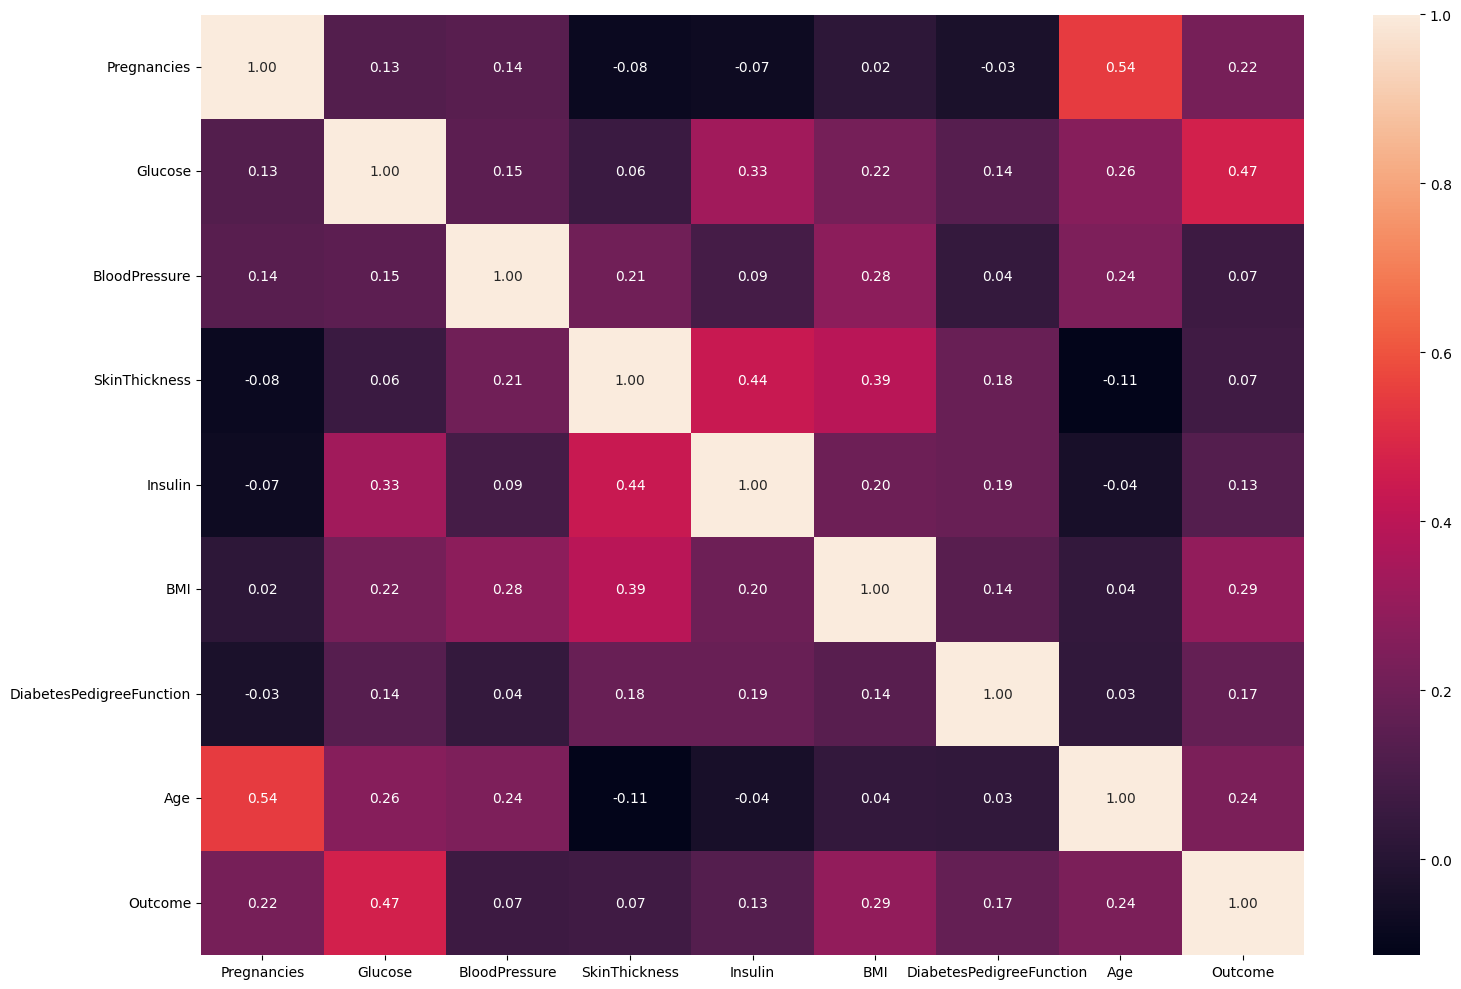

In [8]:
# Heatmap of Dataset

# Draw Figure
fig, axis = plt.subplots(figsize=(16, 10))

# Plot Heatmap

sns.heatmap(total_data.corr(), annot=True, fmt='.2f')

# Adjust Plot
plt.tight_layout()

#Show Plot
plt.show()

Looking at the Heatmap: 

- Glucose is highly correlated with the Outcome of Being Diabetic
- We can also see that Insulin, BMI, DiabetesPedigreeFunction, Age

#### Feature Engineering

In [9]:
# DataSet Data Description

total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Outliers Cleaning

total_data = total_data[(total_data['Glucose'] > 0) & (total_data['BloodPressure'] > 40) & (total_data['BMI'] > 3) & (total_data['SkinThickness'] < 33 )]


In [11]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536 entries, 1 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               536 non-null    int64  
 1   Glucose                   536 non-null    int64  
 2   BloodPressure             536 non-null    int64  
 3   SkinThickness             536 non-null    int64  
 4   Insulin                   536 non-null    int64  
 5   BMI                       536 non-null    float64
 6   DiabetesPedigreeFunction  536 non-null    float64
 7   Age                       536 non-null    int64  
 8   Outcome                   536 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 41.9 KB


In [12]:
# Null Calculation

total_data.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
# Normalization 
from sklearn.preprocessing import StandardScaler

num_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                     'DiabetesPedigreeFunction', 'Age']

scaler = StandardScaler()
norm_features = scaler.fit_transform(total_data[num_variables])
total_data_norm = pd.DataFrame(norm_features, index = total_data.index, columns = num_variables)
total_data_norm['Outcome'] = total_data['Outcome']
total_data_norm.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,-0.881012,-1.128989,-0.485129,1.147473,-0.640675,-0.681174,-0.326718,-0.203135,0
2,1.299434,2.122479,-0.654199,-1.214328,-0.640675,-1.231238,0.755523,-0.120525,1
3,-0.881012,-0.996276,-0.485129,0.658825,0.313106,-0.431145,-0.947068,-1.029237,0
5,0.364957,-0.100463,0.191150,-1.214328,-0.640675,-0.847860,-0.832438,-0.285745,0
6,-0.258027,-1.361236,-1.837688,1.391797,0.252227,0.052245,-0.673979,-0.616186,1


In [14]:
# Split DataSet and Select Best Features
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples.
X = total_data_norm.drop('Outcome', axis = 1)
y = total_data_norm['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(k = 6)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,1.922419,-1.460771,0.867429,0.435623,-0.623407,0.375137
1,-0.569520,-0.266354,-0.992339,-0.747848,-0.353690,-0.864017
2,-0.881012,-0.896741,-0.823269,-1.864645,0.114944,-0.698796
3,1.610927,-0.233176,0.867429,0.585640,-0.633521,0.209916
4,0.987942,-0.432246,-0.992339,-0.697843,-0.512148,-0.368355


In [15]:
X_train_sel['Outcome'] = list(y_train)
X_test_sel['Outcome'] = list(y_test)

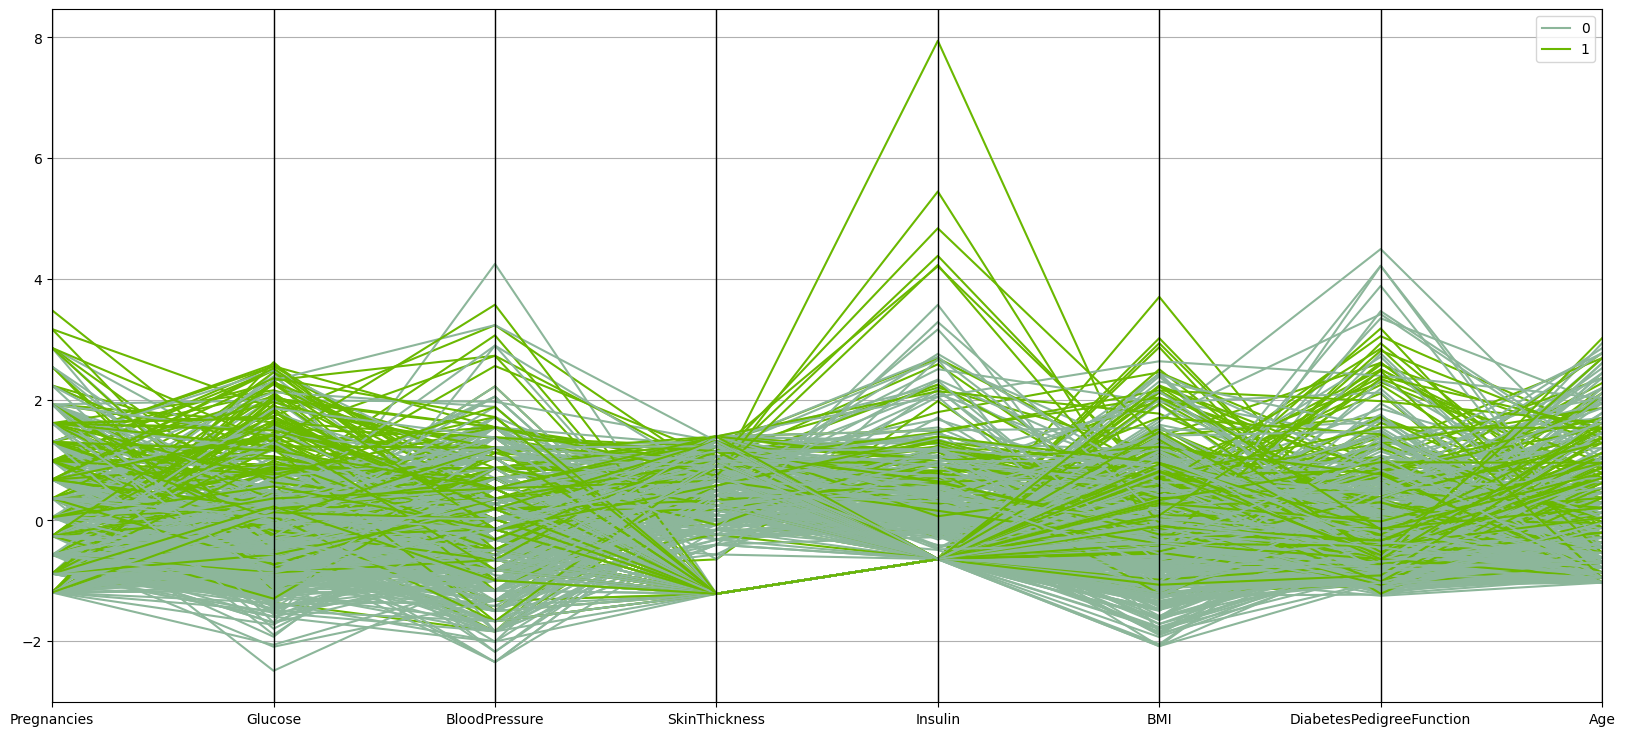

In [16]:
# Plot Parallel Coordinates
total_data = X
total_data['Outcome'] = y

plt.figure(figsize=(20, 9))
pd.plotting.parallel_coordinates(total_data, 'Outcome')
plt.show()

In [17]:
X_train_sel.to_csv("/workspaces/gustavolima-decisiontree/data/processed/train_decision-tree_diabetes.csv", index=False)
X_test_sel.to_csv("/workspaces/gustavolima-decisiontree/data/processed/test_decision-tree_diabetes.csv", index=False)

#### Train the Model

In [18]:
# Train the Data
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

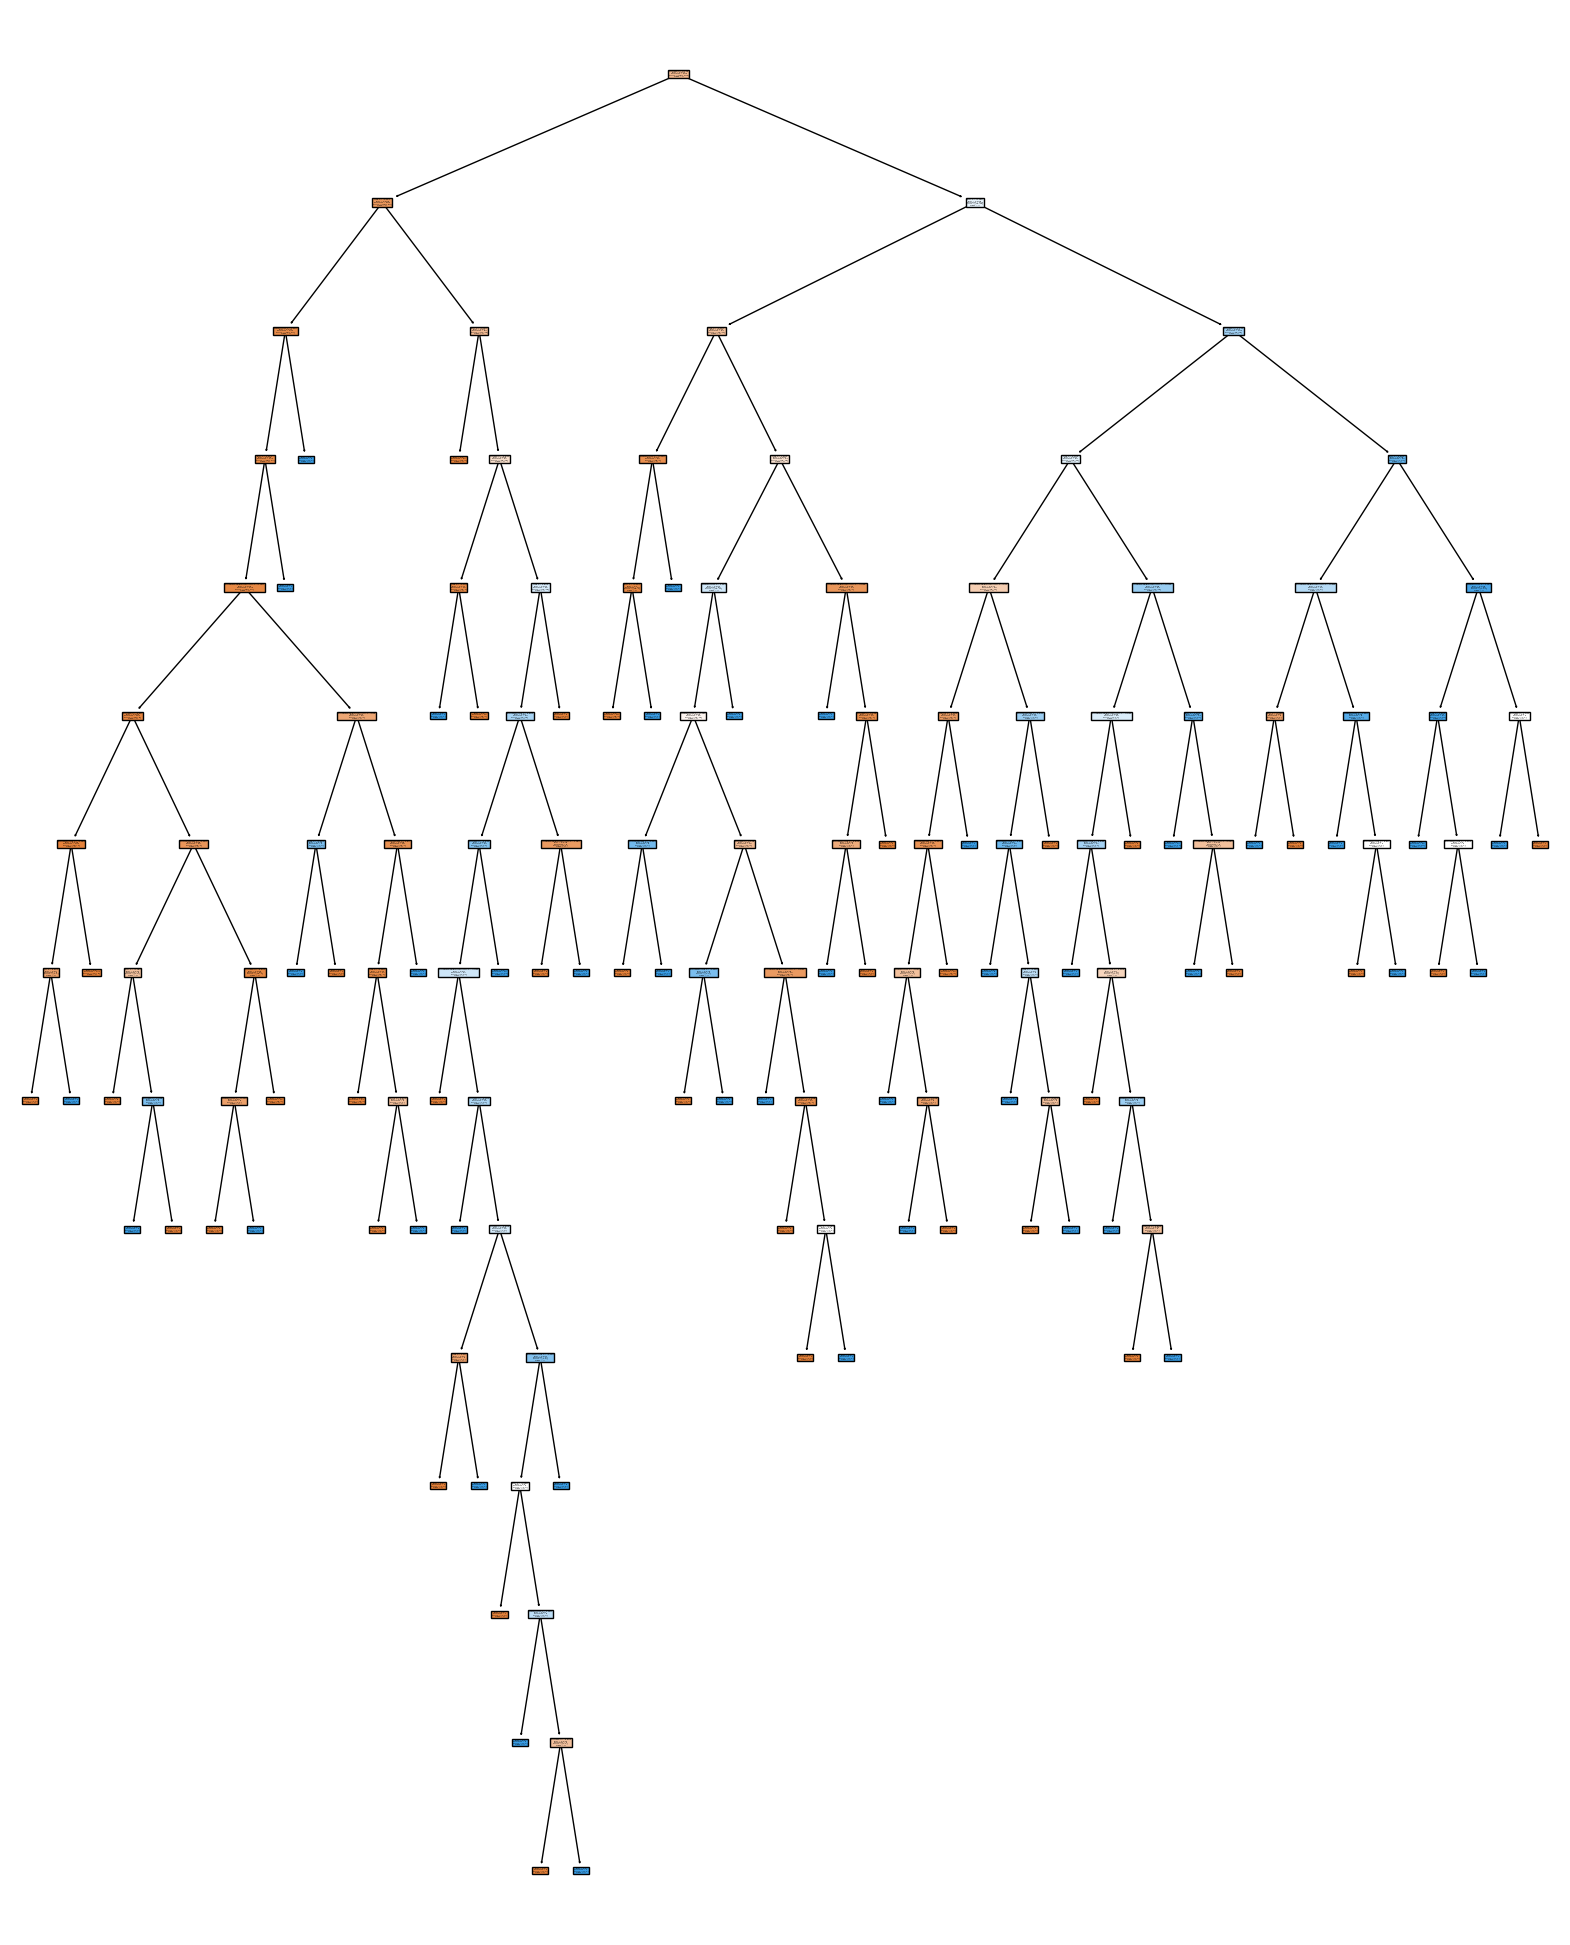

<Figure size 640x480 with 0 Axes>

In [19]:
# Plot the Decision Tree
from sklearn import tree

fig = plt.figure(figsize=(20,25))

tree.plot_tree(model,
               feature_names = list(X_train.columns),
               class_names = ["0", "1"],
               filled = True)

plt.show()
plt.savefig('/workspaces/gustavolima-decisiontree/assets/tree.png')

In [20]:
# Model Prediction
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [21]:
# Check Accuracy
from sklearn.metrics import accuracy_score

print(f'The Accuracy is: {accuracy_score(y_test, y_pred)}')

The Accuracy is: 0.6666666666666666


In [22]:
# Save the Model
from pickle import dump

dump(model, open("/workspaces/gustavolima-decisiontree/models/decision_tree_classifier_default_42.sav", "wb"))

#### Model Hyperparameters Optimization

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
# We define the parameters by hand that we want to adjust
hyperparams = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 9, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [29]:
#  Train the Model
grid.fit(X_train, y_train)

# Print Best Param. and Est.
best_params = grid.best_params_
best_model = grid.best_estimator_

In [30]:
# Predict the Labels
y_pred_best = best_model.predict(X_test)

# Calculate the Model with new Parameters
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [31]:
model_grid = DecisionTreeClassifier(max_depth = None, min_samples_leaf = 1, min_samples_split = 5)
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_best}')

Accuracy: 0.7222222222222222
